# Класифікація зображень за допомогою персептрону з використанням набору даних Fashion MNIST і пакетів TensorFlow/Keras

![clothes dataset images](https://github.com/mmphego/TensorFlow-Course/raw/master/img/clothes.png)

*Рисунок 1. Зразки [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) (by Zalando, MIT License).*

## Вступ

Інструменти машинного навчання (ML)/Deep Learning(DL)/нейронних мереж (NN) нещодавно викликали величезний фурор завдяки додаткам для аналізу даних, класифікації зображень і генерації даних. Хоча методи ML існують десятиліттями, останні досягнення в апаратному забезпеченні створили достатньо потужні системи для запуску цих алгоритмів.

Типовий приклад «Привіт, світ» для ML — це класифікатор, навчений на базі даних MNIST (модифікована база даних Національного інституту стандартів і технологій); набір рукописних цифр 0-9. Цей набір даних стає трохи застарілим і більше не справляє враження як через його уявну простоту, так і через безліч існуючих посібників на цю тему. Тут ми будемо використовувати новіший набір даних для виконання нашого ML "Привіт, світ", набір даних Fashion MNIST!

Нульовий крок ML (який слід виконати, перш ніж покласти руку на мишу або палець на клавішу) — це розуміння формату та розміру ваших даних. Цей крок часто називають розробкою ознак. Розробка ознак, як правило, включає вибір і попередню обробку окремих аспектів навчальних даних для надання алгоритму навчання класифікатора.

Набір даних Fashion MNIST складається з 70 000 зображень предметів одягу в градаціях сірого. Значення градацій сірого для пікселя в діапазоні від 0 до 255 (від чорного до білого). Кожне зображення з низькою роздільною здатністю має розмір 28x28 пікселів і відображає рівно один предмет одягу. Поруч із кожним зображенням є мітка, яка розміщує статтю в категорії; ці категорії показані на малюнку 2 із прикладом зображення, що належить до класу.




![детальний перегляд категорій одягу](https://github.com/mmphego/TensorFlow-Course/raw/master/img/clothesDetails.png)

*Рисунок 2. Зразки зображень. Номери класів наведено біля міток зображень*



In [2]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

## Імпортуємо набір даних Fashion MNIST

Для навчання нейронним мереж глибокого навчання потрібно багато даних. 70 000 прикладів — це невеличкий набір даних з цього приводу. Зробимо просте співвідношення 6:1 навчання:тестування (коли дані обмежені, це може бути вашим єдиним виходом).

Спочатку ми завантажуємо набір даних із пакету Keras:



In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Перший рядок просто призначає назву fashion_mnist певному набору даних, розташованому в бібліотеці набору даних tensorflow/Keras. Другий рядок визначає чотири масиви, що містять навчальні та тестові дані, знову розбиті на окремі структури для зображень і міток. Навчальні масиви даних використовуватимуться для навчання моделі, а тестові масиви дозволять оцінити продуктивність створеної моделі.

## Перегляд даних

Вище було імпортовано MatPlotLib, бібліотеку для створення графіків і діаграм. Нижче її використано для візуалізації прикладу набору даних Fashion MNIST.

In [4]:
print(f"Train images dimensions: {train_images.shape}")
print(f"Test images dimensions: {test_images.shape}")

Train images dimensions: (60000, 28, 28)
Test images dimensions: (10000, 28, 28)


Перша команда створює рисунок розміром 10х5. Команда 2 визначає, що саме ми будемо рисувати: перший елемент із масиву train_images. ПРИМІТКА. І остання команда, «show()», повідомляє Python створити цю фігуру у зовнішньому (з CMD) вікні.


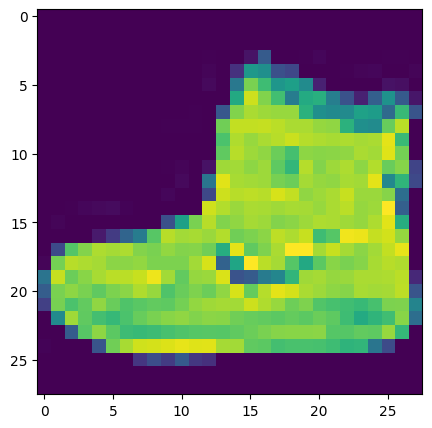

In [5]:
plt.figure(figsize=(10,5))
plt.imshow(train_images[0])
plt.colormaps()
plt.show()

## Попередня обробка набору даних

Зображення у відтінках сірого містить для кожного пікселя значення в діапазоні 0-255. Необхідно масштабувати ці значення в діапазон до 0-1. Кожне зображення зберігається як двовимірний масив, де кожне числове значення в масиві є кодом градацій сірого певного пікселя. Якщо поділити весь масив на скаляр, буде створено новий масив, елементи якого є оригінальними елементами, поділеними на скаляр.

In [6]:
train_images = train_images /255.
test_images = test_images / 255

## Створення моделі

Кожна побудована мережа побудована з серії з’єднаних рівнів, які заповнені вузлами з’єднання. Прості математичні операції виконуються на кожному вузлі кожного рівня, але завдяки великій кількості з’єднань і операцій ці моделі ML можуть виконувати вражаючі та складні завдання.

Модель для класифікації зображень буде побудована з 3 шарів. Перший рівень, який часто називають вхідним рівнем, отримає зображення та відформатує структуру даних методом, прийнятним для наступних рівнів. У нашому випадку цей перший шар буде шаром Flatten, який приймає багатовимірний масив і створює масив з одним виміром, це розміщує всі піксельні дані на однаковій глибині під час введення. Обидва наступні шари будуть простими повністю пов’язаними шарами, які називаються щільними шарами (Dense), з 128 і 10 вузлами відповідно (кількість нейронів в останньому шарі відповідає кількості класів). Ці повністю з’єднані рівні є найпростішим рівнем у сенсі розуміння, але допускають найбільшу кількість зв’язків і зв’язків між рівнями.

Прихований щільний шар матиме функцію активації Rectified Linear Unit (ReLU), яка виводить значення від нуля до 1; Математично функція активації поводиться так: f(x)=max(0,x). Останній шар використовує функцію активації softmax. Ця функція також створює значення в діапазоні 0-1, АЛЕ генерує ці значення так, що сума виходів буде 1! Це робить softmax шаром, який чудово виводить ймовірності.

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

c:\Users\1234\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Запуск наведеного нижче коду створює файл `model_plot.png` із графіним виглядом створеної моделі.

In [9]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

Давайте візуалізуємо, як буде виглядати нейронна мережа (нижче використано простий і легкий у використанні інструмент для створення візуалізацій нейронної мережі - пакет nnv):

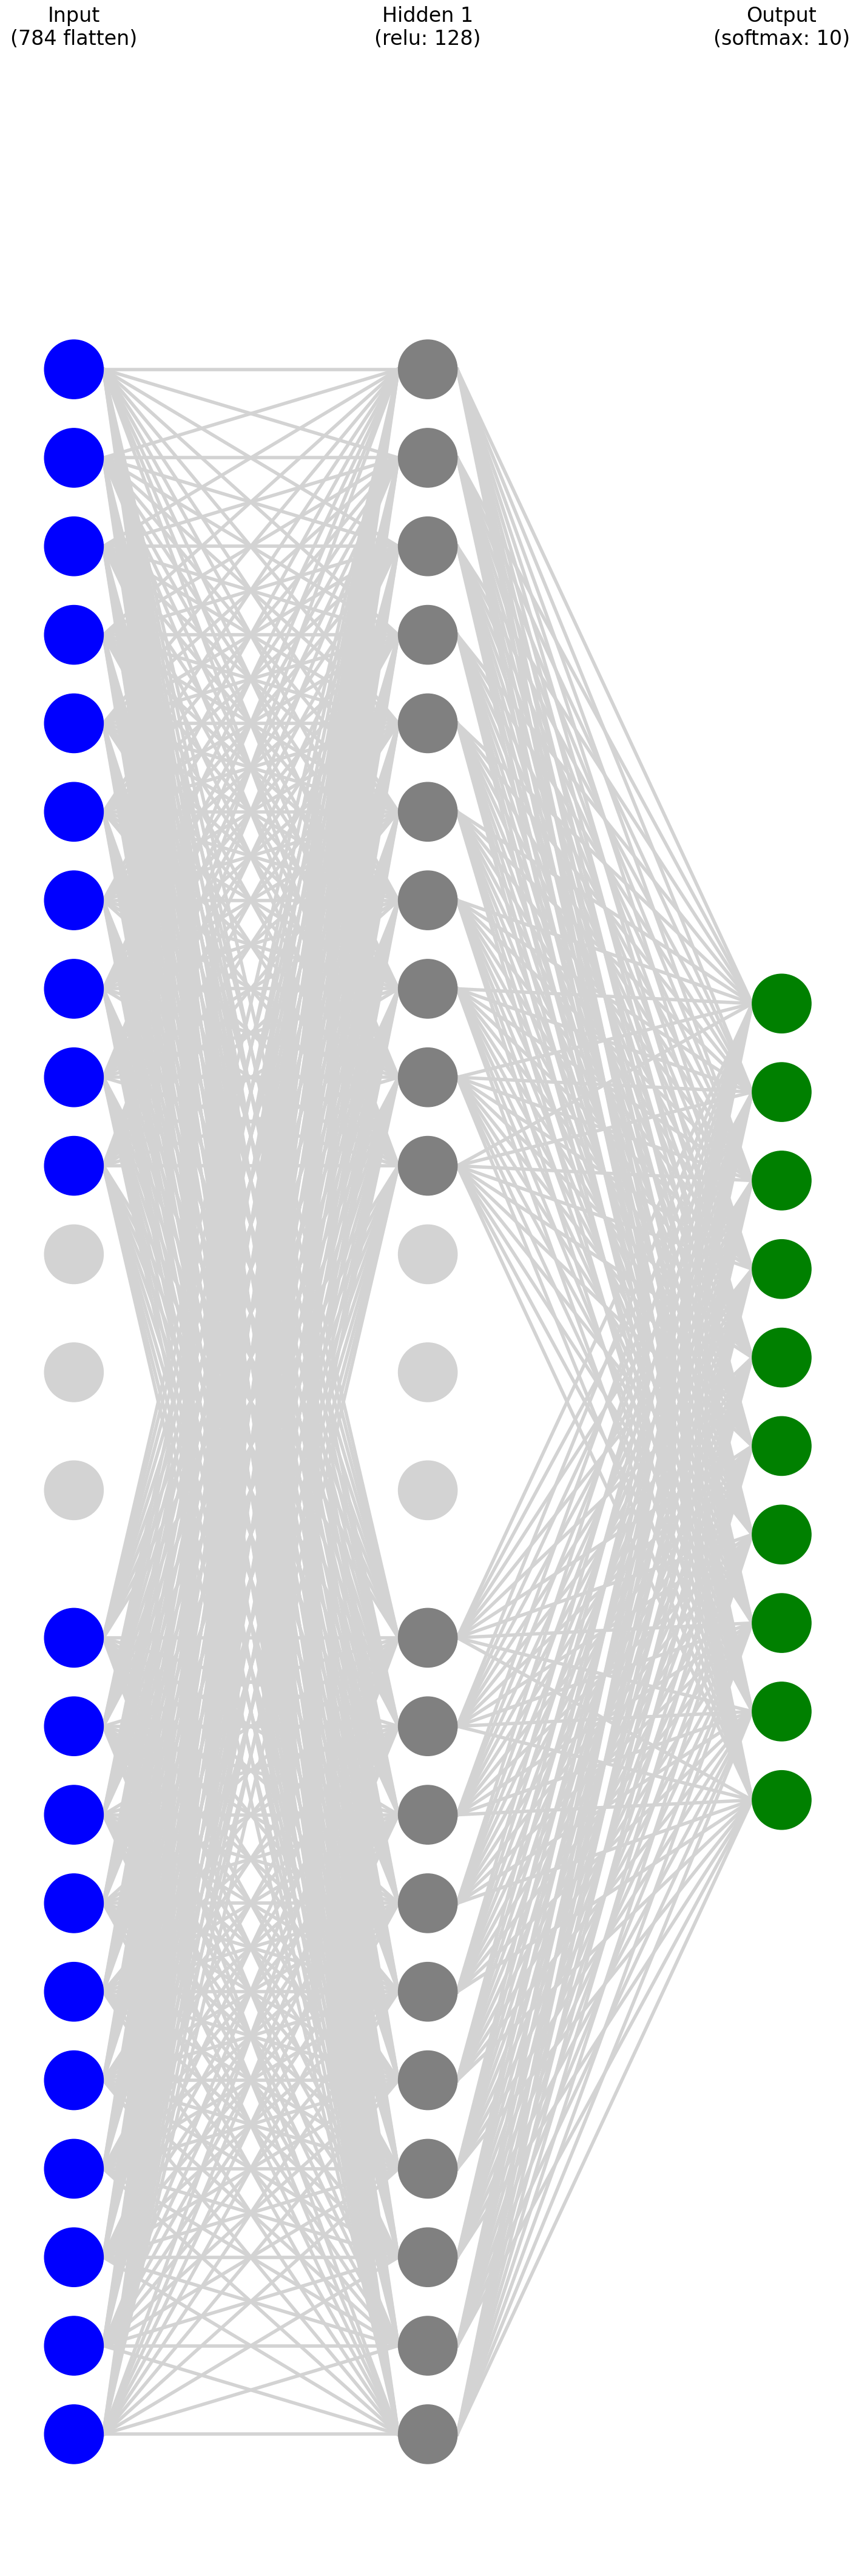

(<Figure size 20000x5000 with 1 Axes>, <Axes: >)

In [10]:
from nnv import NNV
plt.rcParams["figure.figsize"] = 200,50

layersList = [
    {"title":"Input\n(784 flatten)", "units": 784, "color": "Blue"},
    {"title":"Hidden 1\n(relu: 128)", "units": 128},
    {"title":"Output\n(softmax: 10)", "units": 10,"color": "Green"},
]
NNV(layersList, spacing_layer=10, max_num_nodes_visible=20, node_radius=1, font_size=24).render()

## Навчання моделі

Моделі необхідно скомпільувати та навчити перед використанням. Під час компіляції ми повинні визначити ще кілька параметрів, які керують тим, як моделі оновлюються під час навчання (оптимізатор), як вимірюється точність моделі під час навчання (функція втрат) і що потрібно виміряти, щоб визначити точність моделі (метрики). Ці значення було вибрано для цього проекту, але вони, як правило, залежать від наміру моделі та очікуваних вхідних і вихідних даних.

In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Якщо модель створено та скомпільовано, код, необхідний для навчання моделі, складається з одного рядка.

In [12]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7821 - loss: 0.6260
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8627 - loss: 0.3768
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8762 - loss: 0.3398
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8856 - loss: 0.3109
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8923 - loss: 0.2897


Цей єдиний рядок завершує всю роботу з навчання нашої моделі. Розглянемо аргументи, надані команді `model.fit`.

- Перший аргумент — це вхідні дані. Вхідний шар Flatten приймає масив (28,28), який відповідає розмірності зображень датасета.
- Далі ми навчаємо систему, надаючи правильну класифікацію для всіх навчальних прикладів.
- Остаточним аргументом є кількість епох, проведених під час навчання; кожна епоха є циклом навчання над усіма навчальними даними. Наше встановлення значення епохи на 5 означає, що модель буде навчено загалом 60 000 прикладів навчання 5 разів. Після кожної епохи ми отримуємо як значення функції втрат, так і точність моделі у цю епоху.



## Оцінка нашої моделі

Зараз ми працюємо з функціональною та навченою моделлю нейронної мережи (класифікатором). Вище створено нейронна мережа, який приймає масив (28,28), зводить його дані в масив (784), скомпільував і навчив 2 щільних шари, а функція активації softmax кінцевого вихідного рівня буде забезпечують ймовірність того, що зображення належить до кожної з 10 категорій міток.

Якість свореної моделі можна оцінити за допомогою команди `model.evaluate`, яка приймає тестові зображення та мітки для порівняння з результатами роботи моделі (прогнозом). `model.evaluate` надає два виходи: значення функції втрат для прикладів тестування та точність моделі для цієї сукупності даних. Нижче надруковано точність моделі.

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Model Accuracy: {test_acc * 100}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8772 - loss: 0.3480
Model Accuracy: 87.74999976158142%


Створена модель працює з точністю 87,75%. Надамо декілька тестових прикладів, щоб подивитись на роботу з результатами.

In [18]:
predictions = model.predict(test_images)
predictions[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([1.6992328e-04, 8.4517922e-09, 9.9527609e-01, 6.4190866e-09,
       3.3603108e-03, 5.4577270e-14, 1.1936411e-03, 4.6068707e-15,
       2.3787267e-10, 5.6040272e-14], dtype=float32)

Більшість записів у масиві передбачень дуже близькі до 0. Вони записані в науковій нотації – значення після e є числом десяткових знаків для коригування значення (наприклад, 5.1 e-04 насправді 0,00051). Запис, який виділяється, це `predictions[0][3]` з 0.9953 (9.9527609e-01), або 
99,53%, упевненістю, що це зображення слід класифікувати як завантаження!

Нижче визначимо мітку класу, ми можемо спростити вивід:

In [19]:
np.argmax(predictions[1])

2

Нарешті, ми можемо перевірити це передбачення, подивившись на етикетку:

In [16]:
test_labels[1]

2

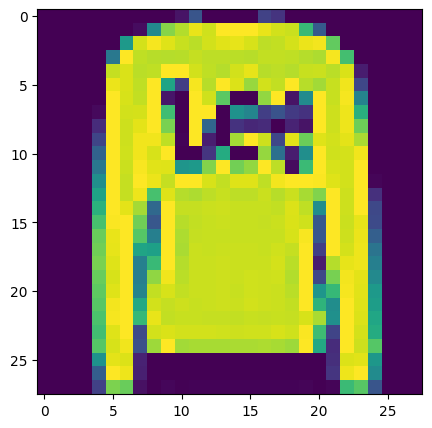

In [20]:
plt.figure(figsize=(10,5))
plt.imshow(test_images[1])
plt.colormaps()
plt.show()

Таким чином, за допомогою найпростішої нейронної мережи зображення сорочки класифіковано як сорочку!


## **Завдання**

1. Дослідити, як впливає на досягнуту точність клькість епох навчання, додавання прихованих шарів та кількості нейронів в ціх шарах.
2. Зробити ще декілька перевірок, як класифікуються інши тестові зображення.